<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Intro-to-Data-Science/blob/main/Assignment_3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from scipy import stats
from matplotlib.pyplot import figure



df = pd.read_csv('https://raw.githubusercontent.com/hoangcuongnguyen2001/Intro-to-Data-Science/main/Assignment%203/Wine_Recognition.csv')
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
display(df.describe())
print(df)
first_df = df[df.duplicated()]
print(first_df)

df = df.drop_duplicates()
display(df.describe())
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#df.boxplot(column =[ 'alcohol', 'fixed acidity', 'residual sugar'], grid = False)

The dataset has 2000 rows and 12 columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.710800,0.390138,0.313860,4.486700,0.064325,25.981500,86.729250,0.995041,3.220795,0.569190,10.775650
std,1.713865,0.186798,0.157363,4.036863,0.036238,17.802658,55.969674,0.003180,0.162052,0.156603,1.240472
min,4.200000,0.085000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987220,2.790000,0.220000,8.000000
25%,6.600000,0.250000,0.240000,2.000000,0.040000,12.000000,35.000000,0.992260,3.110000,0.460000,9.600000
50%,7.200000,0.340000,0.310000,2.600000,0.058000,23.000000,86.500000,0.995510,3.210000,0.550000,10.700000
75%,8.600000,0.500000,0.402500,6.000000,0.081000,36.000000,126.000000,0.997540,3.320000,0.650000,11.700000
max,15.900000,1.580000,1.230000,26.050000,0.422000,138.500000,294.000000,1.003200,3.900000,1.620000,14.900000


      fixed acidity  volatile acidity  ...  alcohol  Wine Type
0               7.5             0.530  ...     10.7          R
1              11.1             0.180  ...     10.1          R
2               8.3             0.705  ...     10.0          R
3               7.4             0.670  ...      9.5          R
4               8.4             0.650  ...      9.2          R
...             ...               ...  ...      ...        ...
1995            6.7             0.280  ...     11.0          W
1996            8.0             0.370  ...     12.1          W
1997            6.7             0.280  ...     11.0          W
1998            6.0             0.260  ...     12.8          W
1999            6.4             0.240  ...     10.5          W

[2000 rows x 12 columns]
      fixed acidity  volatile acidity  ...  alcohol  Wine Type
10             10.3              0.53  ...      9.3          R
19              9.6              0.77  ...     10.4          R
20              9.8          

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,7.756586,0.395671,0.315022,4.142888,0.065569,25.343228,84.163884,0.994950,3.225609,0.573915,10.831354
std,1.740809,0.190222,0.160729,3.674701,0.038149,17.579892,55.140931,0.003185,0.160955,0.159505,1.239645
min,4.200000,0.085000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987220,2.790000,0.220000,8.000000
25%,6.600000,0.250000,0.230000,1.900000,0.040000,11.000000,33.000000,0.992200,3.120000,0.470000,9.700000
50%,7.200000,0.350000,0.310000,2.500000,0.060000,23.000000,84.000000,0.995440,3.220000,0.560000,10.800000
75%,8.700000,0.510000,0.410000,5.000000,0.082000,35.000000,123.000000,0.997440,3.330000,0.650000,11.800000
max,15.900000,1.580000,1.230000,26.050000,0.422000,138.500000,294.000000,1.003200,3.900000,1.620000,14.900000


In [ ]:
#print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

continuous = df.iloc[:, 0:11].values
categorical = df.iloc[:, 11].values

new_df = df[(np.abs(stats.zscore(continuous)) < 3).all(axis=1)]
new_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,7.706321,0.391009,0.308110,3.831473,0.062387,24.693679,82.702757,0.994728,3.229106,0.566207,10.885945
std,1.632757,0.179735,0.151742,3.061876,0.027521,15.947133,52.963185,0.003115,0.155155,0.144231,1.219656
min,4.200000,0.085000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987220,2.790000,0.220000,8.000000
25%,6.600000,0.250000,0.230000,1.900000,0.040000,11.000000,33.000000,0.992000,3.120000,0.470000,9.800000
50%,7.200000,0.350000,0.310000,2.500000,0.059000,23.000000,82.000000,0.995230,3.220000,0.550000,10.800000
75%,8.700000,0.510000,0.400000,4.800000,0.081000,35.000000,121.000000,0.997250,3.330000,0.650000,11.800000
max,12.900000,0.965000,0.760000,15.100000,0.178000,78.000000,248.000000,1.002890,3.700000,1.050000,14.200000


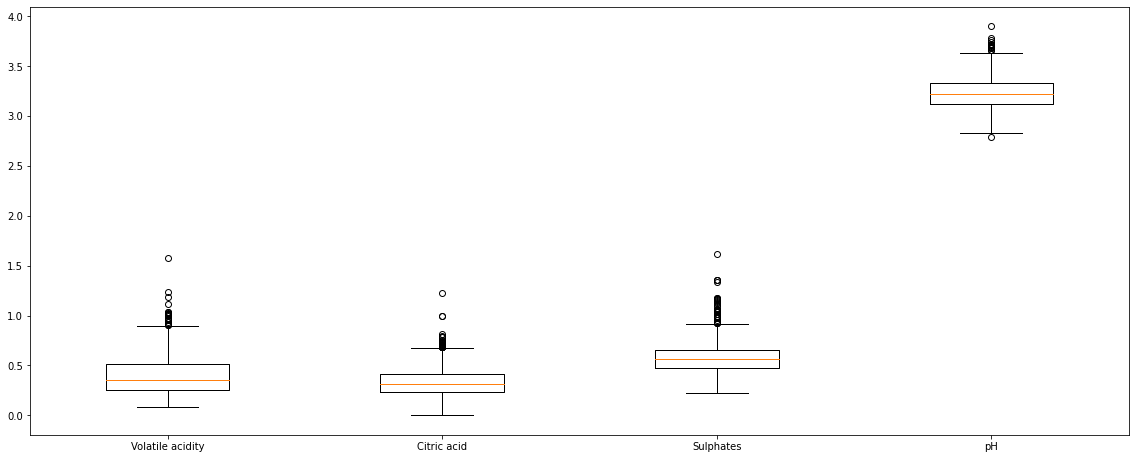

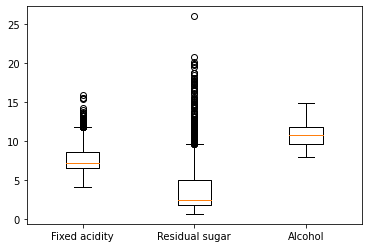

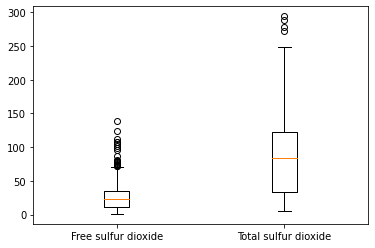

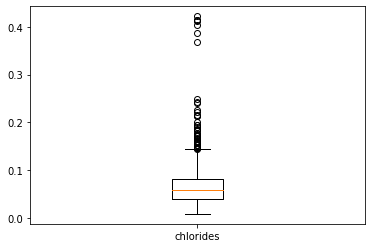

In [ ]:
def cm_to_inch(value):
    return value/2.54


plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))

#plt.boxplot(df["density"])
#plt.xticks([1], ["Density"])
#plt.show()

plt.boxplot([df['volatile acidity'],df['citric acid'],df.sulphates, df.pH] , labels = ['Volatile acidity', 'Citric acid','Sulphates', 'pH'])
plt.show()

plt.boxplot([df['fixed acidity'],df['residual sugar'],df.alcohol] , labels = ['Fixed acidity', 'Residual sugar' , 'Alcohol'])
plt.show()

plt.boxplot([df['free sulfur dioxide'], df['total sulfur dioxide']], labels = ['Free sulfur dioxide', 'Total sulfur dioxide'])
plt.show()

plt.boxplot(df.chlorides, labels=["chlorides"])
plt.show()

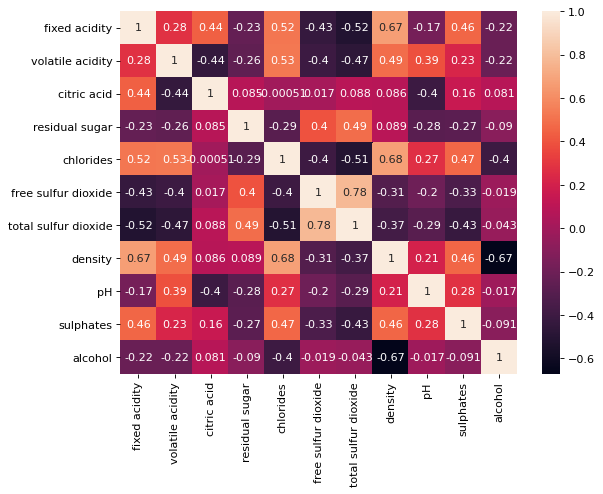

In [ ]:
figure(figsize=(8, 6), dpi=80)
corrMatrix = new_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.select_dtypes(include=['float','object']).dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Wine Type                object
dtype: object

In [ ]:
X = new_df.iloc[:, 0:11].values
Y = new_df.iloc[:, 11].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = np.array(le.fit_transform(Y))
Y.reshape(len(Y), 1)



array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, shuffle= True,random_state = 1)
first_X = X_train.copy()
first_Y = Y_train.copy()
first_X_train, first_X_test, first_Y_train, first_Y_test = train_test_split(first_X, first_Y, test_size = 0.2,shuffle = True, random_state = 1)
new_X = X_test.copy()
new_Y = Y_test.copy()
second_X_train,second_X_test,second_Y_train,second_Y_test = train_test_split(new_X,new_Y,test_size = 0.2,shuffle = True, random_state = 1 )
print(first_X_train.shape[0])
print(first_X_test.shape[0])
print(second_X_train.shape[0])
print(second_X_test.shape[0])


594
149
595
149


In [ ]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
first_X_train = sc.fit_transform(first_X_train)
first_X_test = sc.fit_transform(first_X_test)

second_X_train = sc.fit_transform(second_X_train)
second_X_test = sc.fit_transform(second_X_test)


#calculating for first test.
accuracy = dict()
precision = dict()
from sklearn.linear_model import LogisticRegression



first_test = LogisticRegression(random_state = None)
first_test.fit(first_X_train, first_Y_train)


result = first_test.predict(first_X_train)
first_Y_result = first_test.predict(first_X_test)

from sklearn.metrics import confusion_matrix
tn1,fp1,fn1,tp1 = confusion_matrix(first_Y_test, first_Y_result).ravel()
print('True negative = ', tn1)
print('False positive = ', fp1)
print('False negative = ', fn1)
print('True positive = ', tp1)
unique, counts = np.unique(first_Y_result, return_counts=True)
dict(zip(unique, counts))





True negative =  70
False positive =  1
False negative =  0
True positive =  78


{0: 70, 1: 79}

In [ ]:
new_result = le.inverse_transform(result)
tn3,fp3,fn3,tp3 = confusion_matrix(first_Y_train, result).ravel()
print('True negative = ', tn3)
print('False positive = ', fp3)
print('False negative = ', fn3)
print('True positive = ', tp3)
unique, counts = np.unique(result, return_counts=True)
print(dict(zip(unique, counts)))
from sklearn.metrics import classification_report
report = classification_report(first_Y_test, first_Y_result)
print(report)
Specificity = tn3/(tn3+fp3)
print("Specificity (True negative rate) is : {:0.2f}".format(Specificity))
FalsePositive3 = fp3/(tn3+fp3)
print("False positive rate is : {:0.2f}".format(FalsePositive3))
FalseNegative3 = fn3/(fn3+tp3)
print("False negative rate is : {:0.2f}".format(FalseNegative3))

True negative =  307
False positive =  4
False negative =  2
True positive =  281
{0: 309, 1: 285}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        78

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149

Specificity (True negative rate) is : 0.99
False positive rate is : 0.01
False negative rate is : 0.01


In [ ]:
# Calculating for second test.
second_test = LogisticRegression(random_state=None)
second_test.fit(second_X_train, second_Y_train)

second_Y_result = second_test.predict(second_X_test)
new_result = le.inverse_transform(second_Y_result)

from sklearn.metrics import accuracy_score
accuracy['Second test'] = accuracy_score(second_Y_test, second_Y_result)
print('Accuracy for second test is '  + str(accuracy_score(second_Y_test, second_Y_result)))

from sklearn.metrics import precision_score
precision['Second test'] = precision_score(second_Y_test, second_Y_result)
print('Precision for second test is ' + str(precision_score(second_Y_test, second_Y_result)))

tn2,fp2,fn2,tp2 = confusion_matrix(second_Y_test, second_Y_result).ravel()
print('True negative = ', tn2)
print('False positive = ', fp2)
print('False negative = ', fn2)
print('True positive = ', tp2)
unique, counts = np.unique(new_result, return_counts=True)
dict(zip(unique, counts))

Accuracy for second test is 1.0
Precision for second test is 1.0
True negative =  83
False positive =  0
False negative =  0
True positive =  66


{'R': 83, 'W': 66}

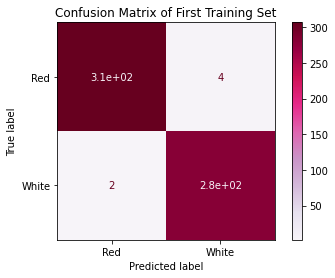

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(first_test,first_X_train, first_Y_train, display_labels= ['Red', 'White'], cmap = plt.cm.PuRd)

plt.title("Confusion Matrix of First Training Set")
plt.show()


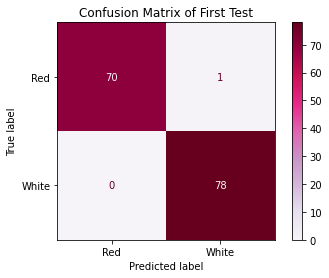

In [ ]:
plot_confusion_matrix(first_test,first_X_test, first_Y_test, display_labels= ['Red', 'White'], cmap = plt.cm.PuRd)
plt.title("Confusion Matrix of First Test")
plt.show()

In [ ]:


new_result = le.inverse_transform(first_Y_result)
unique, counts = np.unique(new_result, return_counts=True)
a = dict(zip(unique, counts))
print(a)

from sklearn.metrics import accuracy_score
accuracy['First test'] = accuracy_score(first_Y_test, first_Y_result)
print('Accuracy for First Test is '  + str(accuracy_score(first_Y_test, first_Y_result)))

from sklearn.metrics import precision_score
precision['First test'] = precision_score(first_Y_test, first_Y_result)
print('Precision for First Test is ' + str(precision_score(first_Y_test, first_Y_result)))
from sklearn.metrics import classification_report
report = classification_report(first_Y_test, first_Y_result)
print(report)
Specificity = tn1/(tn1+fp1)
print("Specificity (True negative rate) is : {:0.2f}".format(Specificity))
FalsePositive1 = fp1/(tn1+fp1)
print("False positive rate is : {:0.2f}".format(FalsePositive1))
FalseNegative1 = fn1/(fn1+tp1)
print("False negative rate is : {:0.2f}".format(FalseNegative1))

{'R': 70, 'W': 79}
Accuracy for First Test is 0.9932885906040269
Precision for First Test is 0.9873417721518988
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        78

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149

Specificity (True negative rate) is : 0.99
False positive rate is : 0.01
False negative rate is : 0.00


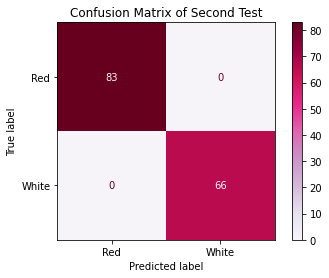

{'R': 83, 'W': 66}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        66

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

Specificity (True negative rate) is : 1.00
False positive rate is : 0.00
False negative rate is : 0.00


In [ ]:
plot_confusion_matrix(second_test,second_X_test, second_Y_test, display_labels= ['Red', 'White'], cmap = plt.cm.PuRd)
plt.title("Confusion Matrix of Second Test")
plt.show()

new_result = le.inverse_transform(second_Y_result)
unique, counts = np.unique(new_result, return_counts=True)
a = dict(zip(unique, counts))
print(a)


report = classification_report(second_Y_test, second_Y_result)
print(report)
Specificity = tn2/(tn2+fp2)
print("Specificity (True negative rate) is : {:0.2f}".format(Specificity))
FalsePositive2 = fp2/(tn2+fp2)
print("False positive rate is : {:0.2f}".format(FalsePositive2))
FalseNegative2 = fn2/(fn2+tp2)
print("False negative rate is : {:0.2f}".format(FalseNegative2))

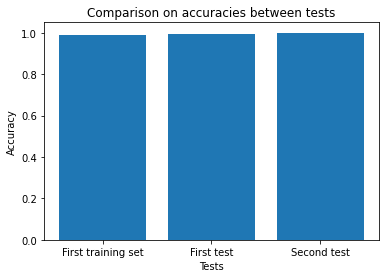

In [ ]:
accuracy['First training set'] = accuracy_score(first_Y_train,result)
precision['First training set'] = precision_score(first_Y_train,result)

Tests = ['First training set', 'First test', 'Second test']
Accuracies = [accuracy['First training set'],accuracy['First test'],accuracy['Second test']]

plt.bar(Tests, Accuracies)
plt.title('Comparison on accuracies between tests')
plt.xlabel('Tests')
plt.ylabel('Accuracy')

#plt.ylim(0.60, 1.05)

plt.show()

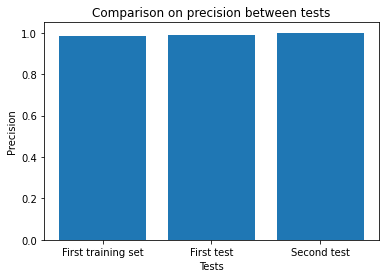

In [ ]:


Tests = ['First training set', 'First test', 'Second test']
Precisions = [precision['First training set'],precision['First test'],precision['Second test']]

plt.bar(Tests, Precisions)
plt.title('Comparison on precision between tests')
plt.xlabel('Tests')
plt.ylabel('Precision')


plt.show()

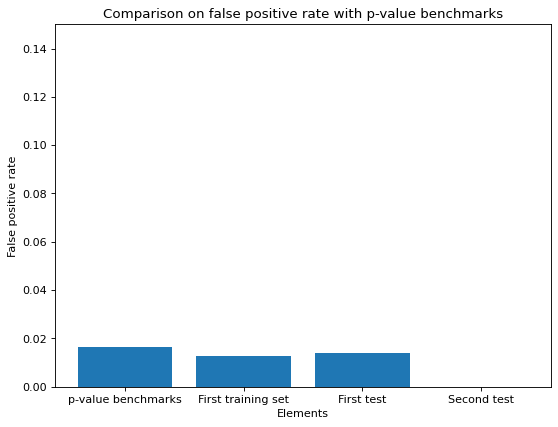

In [ ]:
figure(figsize=(8, 6), dpi=80)

Tests = ['p-value benchmarks', 'First training set', 'First test', 'Second test']
FalsePositives = [0.05/3, FalsePositive3,FalsePositive1, FalsePositive2]

plt.bar(Tests, FalsePositives)
plt.title('Comparison on false positive rate with p-value benchmarks')
plt.xlabel('Elements')
plt.ylabel('False positive rate')

plt.ylim(0.0,0.15)

plt.show()

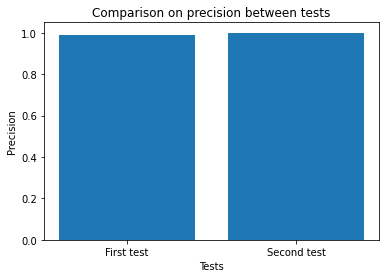

True negative =  70
False positive =  1
False negative =  0
True positive =  78


{0: 70, 1: 79}